<a href="https://colab.research.google.com/github/RichardTwit/App_Project_SpringBoard/blob/main/Bitcoin_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Main import

from itertools import compress
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#File name of data file
#file_path = '/content/drive/MyDrive/bitcoin_analysis.csv'
file_path = 'bitcoin_analysis.csv'
df=pd.read_csv(file_path)

In [ ]:
import pandas as pd
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1


In [ ]:
df.value_counts()

Unnamed: 0  Timestamp   Open      High      Low       Close     Volume_(BTC)  Volume_(Currency)  Weighted_Price  Date                 DayOfYear  Day  Month  Year  Hour  Minute  Second  DayOfWeek  candlestick_pattern      candlestick_match_count  PriceChange  Trend    TrendNum
0           1325317920  4.39      4.39      4.39      4.39      0.455581      2.000000           4.390000        2011-12-31 07:52:00  365        31   12     2011  7     52      0       5          NO_PATTERN               0.0                       0.00        Neutral  1           1
2409184     1543202040  3965.90   3965.90   3962.14   3962.14   2.579070      10227.229860       3965.471396     2018-11-26 03:14:00  330        26   11     2018  3     14      0       0          CDLCLOSINGMARUBOZU_Bear  4.0                      -0.62        Bearish  3           1
2409173     1543201380  3981.24   3982.42   3976.72   3979.09   29.374063     116905.141210      3979.876474     2018-11-26 03:03:00  330        26   11     20

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613769 entries, 0 to 3613768
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   Timestamp                int64  
 2   Open                     float64
 3   High                     float64
 4   Low                      float64
 5   Close                    float64
 6   Volume_(BTC)             float64
 7   Volume_(Currency)        float64
 8   Weighted_Price           float64
 9   Date                     object 
 10  DayOfYear                int64  
 11  Day                      int64  
 12  Month                    int64  
 13  Year                     int64  
 14  Hour                     int64  
 15  Minute                   int64  
 16  Second                   int64  
 17  DayOfWeek                int64  
 18  candlestick_pattern      object 
 19  candlestick_match_count  float64
 20  PriceChange              float64
 21  Trend   

In [ ]:
df.describe()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,DayOfYear,Day,Month,Year,Hour,Minute,Second,DayOfWeek,candlestick_match_count,PriceChange,TrendNum
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3613769.0,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.806884e+06,1.497898e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03,1.820703e+02,1.573606e+01,6.487792e+00,2.016969e+03,1.176550e+01,2.944521e+01,0.0,2.940056e+00,2.566230e+00,1.626385e-02,2.306142e+00
std,1.043205e+06,7.443689e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03,1.069054e+02,8.795334e+00,3.497859e+00,2.379587e+00,6.852106e+00,1.733022e+01,0.0,1.981068e+00,1.734077e+00,1.605863e+01,6.836839e-01
min,0.000000e+00,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.700000e+03,1.000000e+00
25%,9.034420e+05,1.433683e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02,8.800000e+01,8.000000e+00,3.000000e+00,2.015000e+03,6.000000e+00,1.400000e+01,0.0,1.000000e+00,1.000000e+00,-1.000000e+00,2.000000e+00
50%,1.806884e+06,1.505880e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03,1.800000e+02,1.600000e+01,6.000000e+00,2.017000e+03,1.200000e+01,2.900000e+01,0.0,3.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00
75%,2.710326e+06,1.562208e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03,2.760000e+02,2.300000e+01,1.000000e+01,2.019000e+03,1.800000e+01,4.400000e+01,0.0,5.000000e+00,4.000000e+00,1.050000e+00,3.000000e+00
max,3.613768e+06,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04,3.660000e+02,3.100000e+01,1.200000e+01,2.021000e+03,2.300000e+01,5.900000e+01,0.0,6.000000e+00,1.300000e+01,1.198380e+03,3.000000e+00


In [ ]:
df=df.dropna()

In [ ]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613764,3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,...,2021,23,56,0,1,CDL3OUTSIDE_Bear,5.0,-28.31,Bearish,3
3613765,3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,...,2021,23,57,0,1,CDLINVERTEDHAMMER_Bull,6.0,-0.19,Bearish,3
3613766,3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,...,2021,23,58,0,1,CDLMORNINGSTAR_Bull,6.0,38.03,Bullish,2
3613767,3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,...,2021,23,59,0,1,NO_PATTERN,0.0,36.75,Bullish,2


In [ ]:
df.value_counts()

Unnamed: 0  Timestamp   Open      High      Low       Close     Volume_(BTC)  Volume_(Currency)  Weighted_Price  Date                 DayOfYear  Day  Month  Year  Hour  Minute  Second  DayOfWeek  candlestick_pattern      candlestick_match_count  PriceChange  Trend    TrendNum
0           1325317920  4.39      4.39      4.39      4.39      0.455581      2.000000           4.390000        2011-12-31 07:52:00  365        31   12     2011  7     52      0       5          NO_PATTERN               0.0                       0.00        Neutral  1           1
2409184     1543202040  3965.90   3965.90   3962.14   3962.14   2.579070      10227.229860       3965.471396     2018-11-26 03:14:00  330        26   11     2018  3     14      0       0          CDLCLOSINGMARUBOZU_Bear  4.0                      -0.62        Bearish  3           1
2409173     1543201380  3981.24   3982.42   3976.72   3979.09   29.374063     116905.141210      3979.876474     2018-11-26 03:03:00  330        26   11     20

In [ ]:
df.head()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1


In [ ]:
df.describe()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,DayOfYear,Day,Month,Year,Hour,Minute,Second,DayOfWeek,candlestick_match_count,PriceChange,TrendNum
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3613769.0,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.806884e+06,1.497898e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03,1.820703e+02,1.573606e+01,6.487792e+00,2.016969e+03,1.176550e+01,2.944521e+01,0.0,2.940056e+00,2.566230e+00,1.626385e-02,2.306142e+00
std,1.043205e+06,7.443689e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03,1.069054e+02,8.795334e+00,3.497859e+00,2.379587e+00,6.852106e+00,1.733022e+01,0.0,1.981068e+00,1.734077e+00,1.605863e+01,6.836839e-01
min,0.000000e+00,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-1.700000e+03,1.000000e+00
25%,9.034420e+05,1.433683e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02,8.800000e+01,8.000000e+00,3.000000e+00,2.015000e+03,6.000000e+00,1.400000e+01,0.0,1.000000e+00,1.000000e+00,-1.000000e+00,2.000000e+00
50%,1.806884e+06,1.505880e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03,1.800000e+02,1.600000e+01,6.000000e+00,2.017000e+03,1.200000e+01,2.900000e+01,0.0,3.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00
75%,2.710326e+06,1.562208e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03,2.760000e+02,2.300000e+01,1.000000e+01,2.019000e+03,1.800000e+01,4.400000e+01,0.0,5.000000e+00,4.000000e+00,1.050000e+00,3.000000e+00
max,3.613768e+06,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04,3.660000e+02,3.100000e+01,1.200000e+01,2.021000e+03,2.300000e+01,5.900000e+01,0.0,6.000000e+00,1.300000e+01,1.198380e+03,3.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613769 entries, 0 to 3613768
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   Timestamp                int64  
 2   Open                     float64
 3   High                     float64
 4   Low                      float64
 5   Close                    float64
 6   Volume_(BTC)             float64
 7   Volume_(Currency)        float64
 8   Weighted_Price           float64
 9   Date                     object 
 10  DayOfYear                int64  
 11  Day                      int64  
 12  Month                    int64  
 13  Year                     int64  
 14  Hour                     int64  
 15  Minute                   int64  
 16  Second                   int64  
 17  DayOfWeek                int64  
 18  candlestick_pattern      object 
 19  candlestick_match_count  float64
 20  PriceChange              float64
 21  Trend   

In [ ]:
df.iloc[0]

Unnamed: 0                                   0
Timestamp                           1325317920
Open                                      4.39
High                                      4.39
Low                                       4.39
Close                                     4.39
Volume_(BTC)                          0.455581
Volume_(Currency)                          2.0
Weighted_Price                            4.39
Date                       2011-12-31 07:52:00
DayOfYear                                  365
Day                                         31
Month                                       12
Year                                      2011
Hour                                         7
Minute                                      52
Second                                       0
DayOfWeek                                    5
candlestick_pattern                 NO_PATTERN
candlestick_match_count                    0.0
PriceChange                                0.0
Trend        

In [ ]:
#Creating column for Date,Day,etc.
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

In [ ]:
df['DayOfYear'] = pd.to_datetime(df['Timestamp'], unit='s').dt.dayofyear

In [ ]:
df['Day'] = pd.to_datetime(df['Timestamp'], unit='s').dt.day

In [ ]:
df['Month'] = pd.to_datetime(df['Timestamp'], unit='s').dt.month

In [ ]:
df['Year'] = pd.to_datetime(df['Timestamp'], unit='s').dt.year

In [ ]:
df['Hour'] = pd.to_datetime(df['Timestamp'], unit='s').dt.hour

In [ ]:
df['Minute'] = pd.to_datetime(df['Timestamp'], unit='s').dt.minute

In [ ]:
df['Second'] = pd.to_datetime(df['Timestamp'], unit='s').dt.second

In [ ]:
df['DayOfWeek'] = pd.to_datetime(df['Timestamp'], unit='s').dt.dayofweek

In [ ]:
df.head(20)

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1
5,5,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000,2012-01-01 15:28:00,...,2012,15,28,0,6,NO_PATTERN,0.0,0.26,Bullish,2
6,6,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,2012-01-01 22:45:00,...,2012,22,45,0,6,NO_PATTERN,0.0,0.16,Bullish,2
7,7,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,2012-01-02 20:04:00,...,2012,20,4,0,0,CDLGAPSIDESIDEWHITE_Bull,1.0,0.00,Neutral,1
8,8,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000,2012-01-03 11:45:00,...,2012,11,45,0,1,NO_PATTERN,0.0,0.32,Bullish,2
9,9,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000,2012-01-03 14:22:00,...,2012,14,22,0,1,NO_PATTERN,0.0,-0.18,Bearish,3


In [ ]:
df.tail(20)

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
3613749,3613749,1617147600,58616.33,58616.33,58616.33,58616.33,0.000503,2.948226e+01,58616.330000,2021-03-30 23:40:00,...,2021,23,40,0,1,CDLDOJI_Bull,2.0,-0.12,Bearish,3
3613750,3613750,1617147660,58616.33,58616.33,58616.33,58616.33,0.000691,4.051737e+01,58616.330000,2021-03-30 23:41:00,...,2021,23,41,0,1,CDLDOJI_Bull,2.0,0.00,Neutral,1
3613751,3613751,1617147720,58606.95,58620.59,58606.95,58620.59,0.003404,1.995570e+02,58618.245075,2021-03-30 23:42:00,...,2021,23,42,0,1,CDLBELTHOLD_Bull,4.0,4.26,Bullish,2
3613752,3613752,1617147780,58608.96,58608.96,58606.95,58608.38,17.443451,1.022333e+06,58608.402406,2021-03-30 23:43:00,...,2021,23,43,0,1,CDLLONGLEGGEDDOJI_Bull,8.0,-12.21,Bearish,3
3613753,3613753,1617147840,58599.78,58600.00,58599.78,58600.00,3.000086,1.758051e+05,58599.999957,2021-03-30 23:44:00,...,2021,23,44,0,1,CDLDOJI_Bull,2.0,-8.38,Bearish,3
3613754,3613754,1617147900,58599.99,58600.00,58599.99,58600.00,10.412178,6.101536e+05,58599.999683,2021-03-30 23:45:00,...,2021,23,45,0,1,CDLTRISTAR_Bull,4.0,0.00,Neutral,1
3613755,3613755,1617147960,58631.74,58699.00,58631.74,58666.54,10.421432,6.116325e+05,58689.870394,2021-03-30 23:46:00,...,2021,23,46,0,1,CDLBELTHOLD_Bull,1.0,66.54,Bullish,2
3613756,3613756,1617148020,58680.18,58702.79,58680.18,58702.79,0.144199,8.461819e+03,58681.583871,2021-03-30 23:47:00,...,2021,23,47,0,1,CDLBELTHOLD_Bull,4.0,36.25,Bullish,2
3613757,3613757,1617148080,58699.45,58699.45,58675.12,58677.70,1.165074,6.836340e+04,58677.332331,2021-03-30 23:48:00,...,2021,23,48,0,1,CDLTASUKIGAP_Bull,3.0,-25.09,Bearish,3
3613758,3613758,1617148140,58673.20,58673.20,58644.13,58644.13,0.843998,4.949565e+04,58644.258412,2021-03-30 23:49:00,...,2021,23,49,0,1,CDLCLOSINGMARUBOZU_Bear,4.0,-33.57,Bearish,3


In [ ]:
!ls -al '/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'


-rw------- 1 root root 317526599 Jun 22 14:56 /content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [ ]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613764,3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,...,2021,23,56,0,1,CDL3OUTSIDE_Bear,5.0,-28.31,Bearish,3
3613765,3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,...,2021,23,57,0,1,CDLINVERTEDHAMMER_Bull,6.0,-0.19,Bearish,3
3613766,3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,...,2021,23,58,0,1,CDLMORNINGSTAR_Bull,6.0,38.03,Bullish,2
3613767,3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,...,2021,23,59,0,1,NO_PATTERN,0.0,36.75,Bullish,2


         Unnamed: 0   Timestamp      Open      High       Low     Close  \
0                 0  1325317920      4.39      4.39      4.39      4.39   
1                 1  1325346600      4.39      4.39      4.39      4.39   
2                 2  1325350740      4.50      4.57      4.50      4.57   
3                 3  1325350800      4.58      4.58      4.58      4.58   
4                 4  1325391360      4.58      4.58      4.58      4.58   
...             ...         ...       ...       ...       ...       ...   
3613764     3613764  1617148560  58714.31  58714.31  58686.00  58686.00   
3613765     3613765  1617148620  58683.97  58693.43  58683.97  58685.81   
3613766     3613766  1617148680  58693.43  58723.84  58693.43  58723.84   
3613767     3613767  1617148740  58742.18  58770.38  58742.18  58760.59   
3613768     3613768  1617148800  58767.75  58778.18  58755.97  58778.18   

         Volume_(BTC)  Volume_(Currency)  Weighted_Price                Date  \
0            0.4555

In [ ]:
df["PriceChange"]=df["PriceChange"].fillna(0)

In [ ]:
# Define the mapping of categories to numbers
category_mapping = {'Neutral': 1, 'Bullish': 2, 'Bearish': 3}

# Replace categorical values with numbers
df['TrendNum'] = df['Trend'].replace(category_mapping)

In [ ]:
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,...,Year,Hour,Minute,Second,DayOfWeek,candlestick_pattern,candlestick_match_count,PriceChange,Trend,TrendNum
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00,...,2011,7,52,0,5,NO_PATTERN,0.0,0.00,Neutral,1
1,1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00,...,2011,15,50,0,5,NO_PATTERN,0.0,0.00,Neutral,1
2,2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00,...,2011,16,59,0,5,NO_PATTERN,0.0,0.18,Bullish,2
3,3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00,...,2011,17,0,0,5,NO_PATTERN,0.0,0.01,Bullish,2
4,4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00,...,2012,4,16,0,6,NO_PATTERN,0.0,0.00,Neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613764,3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00,...,2021,23,56,0,1,CDL3OUTSIDE_Bear,5.0,-28.31,Bearish,3
3613765,3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00,...,2021,23,57,0,1,CDLINVERTEDHAMMER_Bull,6.0,-0.19,Bearish,3
3613766,3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00,...,2021,23,58,0,1,CDLMORNINGSTAR_Bull,6.0,38.03,Bullish,2
3613767,3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00,...,2021,23,59,0,1,NO_PATTERN,0.0,36.75,Bullish,2


In [ ]:
df.to_csv("/content/drive/MyDrive/bitcoin_analysis.csv")

In [ ]:
import seaborn as sns

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category A', 'Category B', 'Category A']

# Create a count plot
sns.countplot(x=categories)

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot')

# Display the plot
plt.show()


In [ ]:
df.isnull().any()

Unnamed: 0                 False
Timestamp                  False
Open                       False
High                       False
Low                        False
Close                      False
Volume_(BTC)               False
Volume_(Currency)          False
Weighted_Price             False
Date                       False
DayOfYear                  False
Day                        False
Month                      False
Year                       False
Hour                       False
Minute                     False
Second                     False
DayOfWeek                  False
candlestick_pattern        False
candlestick_match_count    False
PriceChange                False
Trend                      False
TrendNum                   False
dtype: bool

In [ ]:
df.isna().any()

Unnamed: 0                 False
Timestamp                  False
Open                       False
High                       False
Low                        False
Close                      False
Volume_(BTC)               False
Volume_(Currency)          False
Weighted_Price             False
Date                       False
DayOfYear                  False
Day                        False
Month                      False
Year                       False
Hour                       False
Minute                     False
Second                     False
DayOfWeek                  False
candlestick_pattern        False
candlestick_match_count    False
PriceChange                False
Trend                      False
TrendNum                   False
dtype: bool

In [87]:
#Get num of columns
df.shape[1]

23

In [ ]:
smaller_df =df[:10000]

In [ ]:
smaller_df.value_counts()

Unnamed: 0  Timestamp   Open   High   Low    Close  Volume_(BTC)  Volume_(Currency)  Weighted_Price  Date                 DayOfYear  Day  Month  Year  Hour  Minute  Second  DayOfWeek  candlestick_pattern       candlestick_match_count  PriceChange  Trend    TrendNum
0           1325317920  4.39   4.39   4.39   4.39   0.455581      2.000000           4.390000        2011-12-31 07:52:00  365        31   12     2011  7     52      0       5          NO_PATTERN                0.0                       0.00        Neutral  1           1
6670        1342573260  8.53   8.60   8.53   8.60   40.000000     343.973967         8.599349        2012-07-18 01:01:00  200        18   7      2012  1     1       0       2          CDLBELTHOLD_Bull          3.0                       0.05        Bullish  2           1
6663        1342571880  8.50   8.50   8.50   8.50   8.032941      68.280000          8.500000        2012-07-18 00:38:00  200        18   7      2012  0     38      0       2          CDLDOJI_

In [ ]:
!ls /content/drive/MyDrive/

 bitcoin_analysis.csv
 bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
 CoinbaseWalletBackups
'CoinbaseWalletBackups (1)'
'Colab Notebooks'
'Copy of XMRScript.gscript'
'Getting started.pdf'
 IFTTT
'Keep kitchen dry.gdoc'
'Untitled document.gdoc'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet (2).gsheet'
'Untitled spreadsheet (3).gsheet'
'Untitled spreadsheet.gsheet'
 XMRBuyOrders.gsheet
 XMRScript.gscript


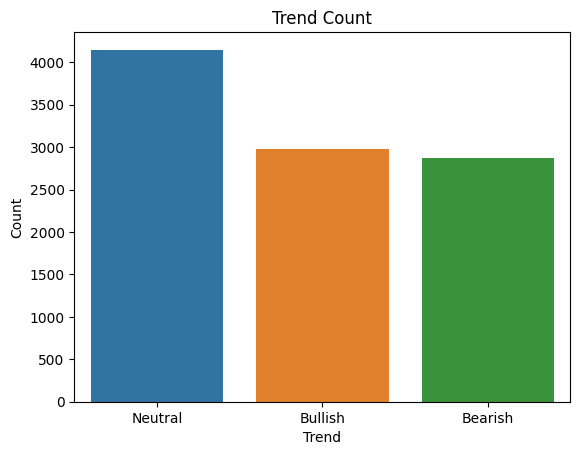

In [82]:
import seaborn as sns


# Create a count plot
sns.countplot(x=smaller_df["Trend"])

# Customize the plot
plt.xlabel('Trend')
plt.ylabel('Count')
plt.title('Trend Count')

# Display the plot
plt.show()


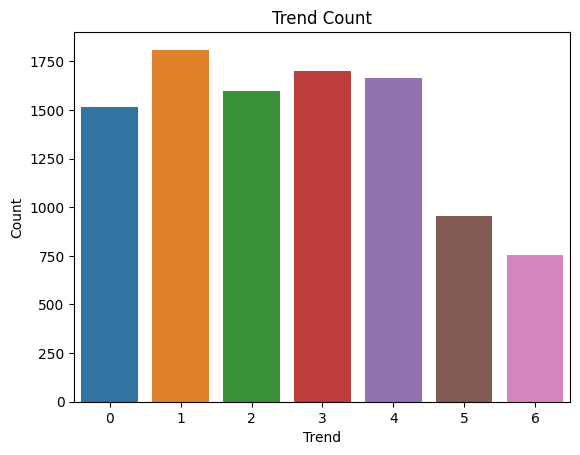

In [83]:
import seaborn as sns


# Create a count plot
sns.countplot(x=smaller_df["DayOfWeek"])

# Customize the plot
plt.xlabel('TreDay Of Weeknd')
plt.ylabel('Count')
plt.title('Day Count')

# Display the plot
plt.show()


In [ ]:
smaller_df.columns

Index(['Unnamed: 0', 'Timestamp', 'Open', 'High', 'Low', 'Close',
       'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'Date',
       'DayOfYear', 'Day', 'Month', 'Year', 'Hour', 'Minute', 'Second',
       'DayOfWeek', 'candlestick_pattern', 'candlestick_match_count',
       'PriceChange', 'Trend', 'TrendNum'],
      dtype='object')

In [ ]:
feature_columns=[ 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'DayOfYear', 'Day',
       'Month', 'Year', 'Hour', 'Minute', 'Second', 'DayOfWeek',
        'candlestick_match_count', 'PriceChange',
        ]

In [88]:
len(feature_columns)

17

In [ ]:
X=smaller_df[feature_columns]

In [ ]:
X

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,DayOfYear,Day,Month,Year,Hour,Minute,Second,DayOfWeek,candlestick_match_count,PriceChange
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,365,31,12,2011,7,52,0,5,0.0,0.00
1,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,365,31,12,2011,15,50,0,5,0.0,0.00
2,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,365,31,12,2011,16,59,0,5,0.0,0.18
3,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,365,31,12,2011,17,0,0,5,0.0,0.01
4,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,1,1,1,2012,4,16,0,6,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.92,9.92,9.92,9.92,18.000000,178.560000,9.920000,232,19,8,2012,11,26,0,6,1.0,0.00
9996,9.92,9.92,9.92,9.92,20.000000,198.400000,9.920000,232,19,8,2012,11,28,0,6,1.0,0.00
9997,9.92,9.92,9.92,9.92,20.000000,198.400000,9.920000,232,19,8,2012,11,29,0,6,1.0,0.00
9998,9.92,9.92,9.92,9.92,59.949265,594.696704,9.920000,232,19,8,2012,11,30,0,6,1.0,0.00


In [ ]:
y=smaller_df['TrendNum']

In [ ]:
y

0       1
1       1
2       2
3       2
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    2
Name: TrendNum, Length: 10000, dtype: int64

In [ ]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Convert the scaled data back to DataFrame
X_train_scaled = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_s, columns=X_test.columns)

In [ ]:
X_train_scaled

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,DayOfYear,Day,Month,Year,Hour,Minute,Second,DayOfWeek,candlestick_match_count,PriceChange
0,0.549748,0.547576,0.551992,0.549919,-0.318713,-0.311572,0.549695,0.684789,0.682047,0.589559,0.020706,0.070702,0.213918,0.0,1.322838,0.590744,0.007043
1,-0.500040,-0.500751,-0.499259,-0.499981,-0.348608,-0.349491,-0.499965,0.310924,1.515160,0.100646,0.020706,0.396624,-0.537975,0.0,0.227450,-0.600615,-0.088135
2,0.307789,0.305954,0.309696,0.307935,-0.232005,-0.217705,0.307766,0.619769,0.205983,0.589559,0.020706,-0.418181,-1.000679,0.0,-0.867939,-0.600615,-0.088135
3,3.133240,3.127472,2.947594,2.942444,0.653697,1.703890,2.974287,1.123674,0.205983,1.078471,0.020706,-0.744103,-1.058517,0.0,0.775144,1.782103,-4.656707
4,0.311692,0.309851,0.313604,0.311838,-0.303748,-0.297765,0.311668,0.668534,0.563031,0.589559,0.020706,0.070702,-1.232031,0.0,0.775144,-0.600615,0.007043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.948834,-0.948920,-0.948679,-0.948824,0.075722,-0.061406,-0.948705,-0.388042,0.086967,-0.388266,0.020706,-0.418181,0.098242,0.0,-0.320245,0.590744,0.387757
6996,1.412213,1.408840,1.415659,1.412477,0.108810,0.340312,1.412055,1.009889,-0.627130,1.078471,0.020706,-0.744103,-1.463382,0.0,0.775144,0.590744,-2.182064
6997,0.366327,0.364411,0.368316,0.366479,-0.038424,0.004910,0.366297,0.636024,0.324999,0.589559,0.020706,-0.092259,-1.347706,0.0,-0.320245,-0.600615,0.007043
6998,-1.011275,-1.011274,-1.011207,-1.011271,0.901640,0.473803,-1.011138,-0.940712,-0.389098,-0.877179,0.020706,0.722545,1.717704,0.0,0.227450,0.590744,-0.373671


In [ ]:
y_train.isna().any()

False

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

c_param_range = [0.001, 0.01, 0.1, 1, 10, 100]

result_table = pd.DataFrame(columns=['C_parameter', 'Accuracy'])

for c_param in c_param_range:
    # Apply logistic regression model to training data
    logreg = LogisticRegression(penalty='l2', C=c_param, random_state=40)
    logreg.fit(X_train_scaled, y_train)

    # Predict using the model
    y_pred_lr = logreg.predict(X_test_scaled)

    # Calculate accuracy score
    Accuracy_lr = accuracy_score(y_test, y_pred_lr)

    # Append results to the table
    result_table = result_table.append({'C_parameter': c_param, 'Accuracy': Accuracy_lr}, ignore_index=True)

print(result_table)


   C_parameter  Accuracy
0        0.001  0.597667
1        0.010  0.738000
2        0.100  0.832333
3        1.000  0.997667
4       10.000  1.000000
5      100.000  1.000000


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test,y_pred_lr)
print(conf_matrix)
Accuracy_lr=logreg.score(X_test_scaled,y_test)

print(Accuracy_lr)


[[1231    0    0]
 [   0  906    0]
 [   0    0  863]]
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Logistic Regression classifier
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_logreg = logreg.predict_proba(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_logreg = label_binarize(y_test, classes=logreg.classes_)

# Compute the ROC-AUC scores for each class
roc_auc_scores_logreg = []
for i in range(len(logreg.classes_)):
    roc_auc = roc_auc_score(y_test_binarized_logreg[:, i], y_proba_logreg[:, i])
    roc_auc_scores_logreg.append(roc_auc)

# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_logreg):
    print(f"Class {logreg.classes_[i]} - ROC-AUC: {score}")


Class 1 - ROC-AUC: 0.9999995407870634
Class 2 - ROC-AUC: 1.0
Class 3 - ROC-AUC: 1.0


In [ ]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     3000 non-null   float64
 1   High                     3000 non-null   float64
 2   Low                      3000 non-null   float64
 3   Close                    3000 non-null   float64
 4   Volume_(BTC)             3000 non-null   float64
 5   Volume_(Currency)        3000 non-null   float64
 6   Weighted_Price           3000 non-null   float64
 7   DayOfYear                3000 non-null   float64
 8   Day                      3000 non-null   float64
 9   Month                    3000 non-null   float64
 10  Year                     3000 non-null   float64
 11  Hour                     3000 non-null   float64
 12  Minute                   3000 non-null   float64
 13  Second                   3000 non-null   float64
 14  DayOfWeek               

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test_scaled)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test_scaled,y_test)
print(Accuracy_svm)

[[1231    0    0]
 [   0  906    0]
 [   0    0  863]]
1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Support Vector Machines classifier
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_svm = svm.predict_proba(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_svm = label_binarize(y_test, classes=svm.classes_)

# Compute the ROC-AUC scores for each class
roc_auc_scores_svm = []
for i in range(len(svm.classes_)):
    roc_auc = roc_auc_score(y_test_binarized_svm[:, i], y_proba_svm[:, i])
    roc_auc_scores_svm.append(roc_auc)

# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_svm):
    print(f"Class {svm.classes_[i]} - ROC-AUC: {score}")


Class 1 - ROC-AUC: 0.9882997135888916
Class 2 - ROC-AUC: 0.9982531821181512
Class 3 - ROC-AUC: 0.9961176230092652


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train_scaled, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test_scaled)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test_scaled,y_test)
print(Accuracy_rf)

[[1231    0    0]
 [   0  906    0]
 [   0    0  863]]
1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Random Forest classifier
random_classifier = RandomForestClassifier()

# Fit the model to the training data
random_classifier.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_random = random_classifier.predict_proba(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_random = label_binarize(y_test, classes=random_classifier.classes_)

# Compute the ROC-AUC scores for each class
roc_auc_scores_random = []
for i in range(len(random_classifier.classes_)):
    roc_auc = roc_auc_score(y_test_binarized_random[:, i], y_proba_random[:, i])
    roc_auc_scores_random.append(roc_auc)

# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_random):
    print(f"Class {random_classifier.classes_[i]} - ROC-AUC: {score}")


Class 1 - ROC-AUC: 1.0
Class 2 - ROC-AUC: 1.0
Class 3 - ROC-AUC: 1.0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test_scaled)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test_scaled,y_test)
print(Accuracy_gbc)

[[   0 1231    0]
 [   0  906    0]
 [   0    0  863]]
0.5896666666666667


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Fit the model to the training data
gradient_boosting_classifier.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_gradient_boosting = gradient_boosting_classifier.predict_proba(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_gradient_boosting = label_binarize(y_test, classes=gradient_boosting_classifier.classes_)

# Compute the ROC-AUC scores for each class
roc_auc_scores_gradient_boosting = []
for i in range(len(gradient_boosting_classifier.classes_)):
    roc_auc = roc_auc_score(y_test_binarized_gradient_boosting[:, i], y_proba_gradient_boosting[:, i])
    roc_auc_scores_gradient_boosting.append(roc_auc)

# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_gradient_boosting):
    print(f"Class {gradient_boosting_classifier.classes_[i]} - ROC-AUC: {score}")


Class 1 - ROC-AUC: 1.0
Class 2 - ROC-AUC: 1.0
Class 3 - ROC-AUC: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test_scaled)


#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test_scaled,y_test)
print(Accuracy_nb)


[[1132    1   98]
 [   0    1  905]
 [   0    0  863]]
0.6653333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Gaussian Naive Bayes classifier
gaussian_nb_classifier = GaussianNB()

# Fit the model to the training data
gaussian_nb_classifier.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_gaussian_nb = gaussian_nb_classifier.predict_proba(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_gaussian_nb = label_binarize(y_test, classes=gaussian_nb_classifier.classes_)

# Compute the ROC-AUC scores for each class
roc_auc_scores_gaussian_nb = []
for i in range(len(gaussian_nb_classifier.classes_)):


    roc_auc = roc_auc_score(y_test_binarized_gaussian_nb[:, i], y_proba_gaussian_nb[:, i])
    roc_auc_scores_gaussian_nb.append(roc_auc)

# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_gaussian_nb):
    print(f"Class {gaussian_nb_classifier.classes_[i]} - ROC-AUC: {score}")


Class 1 - ROC-AUC: 0.9995938261575954
Class 2 - ROC-AUC: 0.9575350365071231
Class 3 - ROC-AUC: 0.9597295566553213


In [ ]:
myLabels = [ 'Logistic Regression','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  roc_auc_scores_logreg,roc_auc_scores_svm,roc_auc_scores_random,roc_auc_scores_gradient_boosting,roc_auc_scores_gaussian_nb]
Accuracy_score = [Accuracy_lr,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]
score1 = [item[0] for item in score_test]
score2 = [item[1] for item in score_test]
score3 = [item[2] for item in score_test]
score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)),
               columns =['Algorithm', 'Model accuracy score'])

score_tab = pd.DataFrame(list(zip(myLabels,score1,score2,score3)),
               columns =['Algorithm',  'ROC-AUC test score_Class_1','ROC-AUC test score_Class_2','ROC-AUC test score_Class_3' ])
print(score_tab_acc)



score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              1.000000
1                  SVM              1.000000
2        Random Forest              1.000000
3       Gradient Boost              0.589667
4          Naive Bayes              0.665333


,Algorithm,ROC-AUC test score_Class_1,ROC-AUC test score_Class_2,ROC-AUC test score_Class_3
0,Logistic Regression,1.000000,1.000000,1.000000
1,SVM,0.988300,0.998253,0.996118
2,Random Forest,1.000000,1.000000,1.000000
3,Gradient Boost,1.000000,1.000000,1.000000
4,Naive Bayes,0.999594,0.957535,0.959730


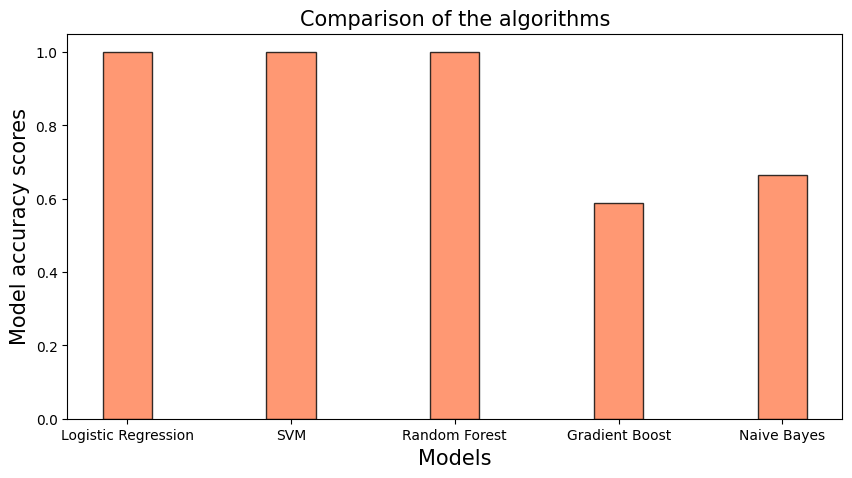

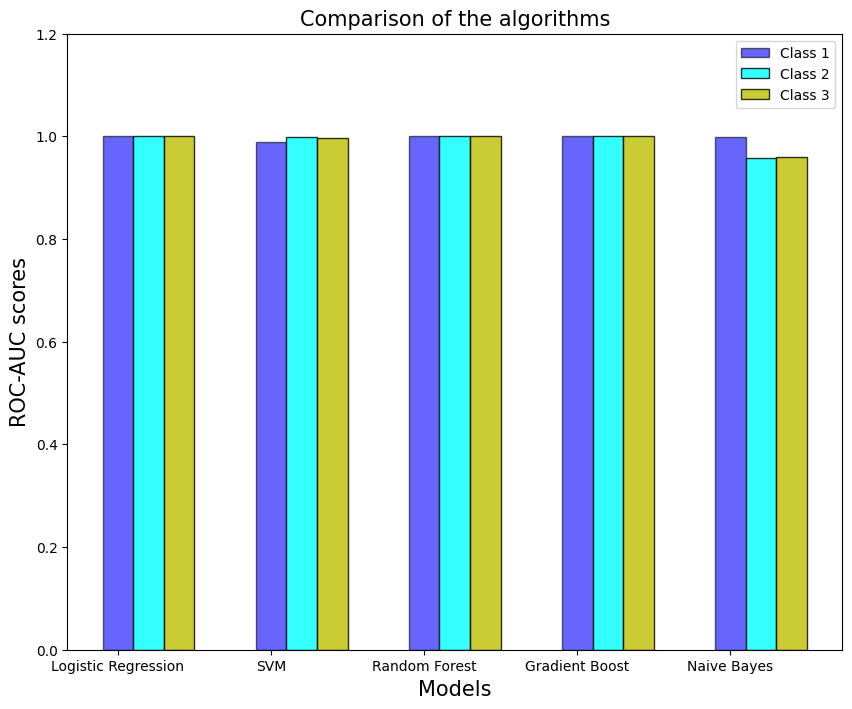

In [ ]:
#plotting the accuracy scores:


index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2,5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2,5.2]
index_acct=[1.4,2.4,3.4,4.4,5.4]
plt.figure(figsize=(10,8))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score1,color='b',alpha=0.6,label='Class 1',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score2,color='cyan',alpha=0.8,label='Class 2',edgecolor='k',width=0.2)
_=plt.bar(index_acct,score3,color='y',alpha=0.8,label='Class 3',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], myLabels)
# Set the maximum number of y ticks
max_y_ticks = 20
plt.yticks(plt.yticks()[0][:max_y_ticks])
plt.legend(loc='upper right')
plt.savefig("27.png")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
'''
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 2, 3],
    'class_weight': [None, 'balanced'],
    'random_state': [42],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'verbose': [0, 1, 2],
    'warm_start': [True, False],
    'n_jobs': [-1]
}

'''

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the LogisticRegression model
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 10.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 1.0


In [ ]:
#Optimal code for linear regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Logistic Regression classifier
logreg = LogisticRegression(C= 10.0, max_iter= 100, penalty= "l1", solver= "liblinear")

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Predict the probabilities for each class
y_proba_logreg = logreg.predict_proba(X_test_scaled)
y_prediction_logreg = logreg.predict(X_test_scaled)

# Binarize the true labels for computing ROC-AUC scores
y_test_binarized_logreg = label_binarize(y_test, classes=logreg.classes_)


acc = accuracy_score(y_test, y_prediction_logreg)


# Compute the ROC-AUC scores for each class
roc_auc_scores_logreg = []
for i in range(len(logreg.classes_)):
    roc_auc = roc_auc_score(y_test_binarized_logreg[:, i], y_proba_logreg[:, i])
    roc_auc_scores_logreg.append(roc_auc)

print(acc)


# Print the ROC-AUC scores for each class
for i, score in enumerate(roc_auc_scores_logreg):
    print(f"Class {logreg.classes_[i]} - ROC-AUC: {score}")


0.9976666666666667
Class 1 - ROC-AUC: 0.9952659738368023
Class 2 - ROC-AUC: 0.9998640075396751
Class 3 - ROC-AUC: 0.9999972888428836


                   Features  Importance scores
0                      Open           0.000000
1                      High           0.000003
2                       Low           0.002128
3                     Close           0.004713
4              Volume_(BTC)           0.004784
5         Volume_(Currency)           0.005681
6            Weighted_Price           0.005846
7                 DayOfYear           0.005915
8                       Day           0.005982
9                     Month           0.006171
10                     Year           0.006494
11                     Hour           0.006637
12                   Minute           0.006766
13                   Second           0.010624
14                DayOfWeek           0.011114
15  candlestick_match_count           0.020310
16              PriceChange           0.896832


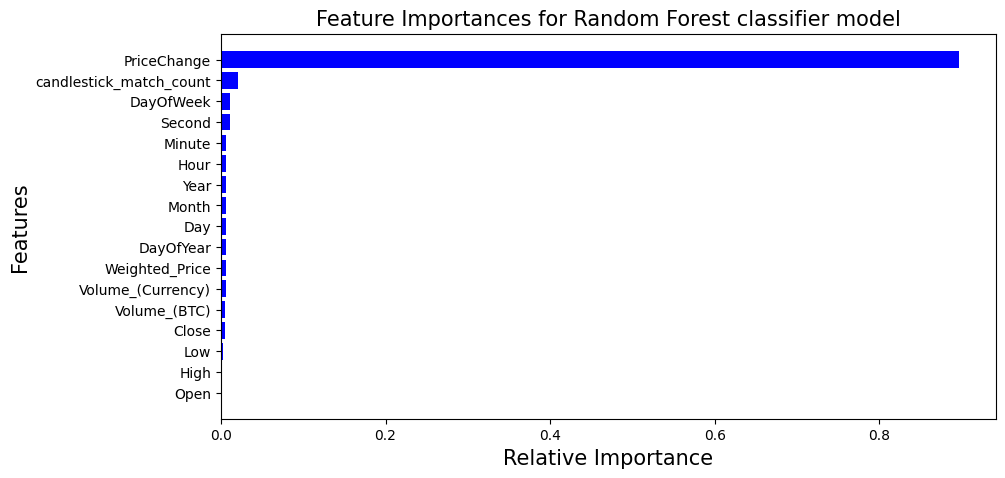

In [89]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores'])
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
#len(importances)

In [ ]:
from sklearn.metrics import log_loss

# Assuming y_true contains the true class labels and y_pred contains the predicted class probabilities
logloss = log_loss(y_test, y_proba_logreg)

print("Log Loss:", logloss)


Log Loss: 0.3569971356159508
Log Loss: 0.3569971356159508


We first collect data for Bitcoin data. We have 23 amount of columns that is use for anaysis. We decide to work with 18 columns for prediction. 17 independent variables and 1 dependent variable. We made some graphs to observe the data. We observe trend count and day of week count.

We decide to use 5 model on our data. The five models are Logistic Regression,SVM,Random Forest,Gradient Boost, Naive Bayes. We calculate confusion matrix and accuracy for all model. The accuracy score for Logistic Regression,SVM,and Random Forest was pretty good, but the accuracy score for Gradient Boost and Naive Bayes was not too. They were a little above 50%.


We choose our best model and did a grid search on them to optimize even more. We ran a training section again with the optimize parameter.

We graph the Roc-Auc testing score. Each model share similiar sizes. There wasn't too much differences.

We also test out features importance. Price change is the most significant feature in the list.

